In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("US Stock Market Dataset20-24.csv")

In [4]:
dataset

,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-Feb-02,2.079,161340.0,72.28,577940.0,3.8215,"43,194.70",42650,901.6,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",260920.0
1,1,2024-Feb-01,2.050,142860.0,73.82,344490.0,3.8535,"43,081.40",47690,922.3,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",238370.0
2,2,2024-Jan-31,2.100,139750.0,75.85,347240.0,3.9060,"42,580.50",56480,932.6,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",214590.0
3,3,2024-Jan-30,2.077,3590.0,77.82,331930.0,3.9110,"42,946.20",55130,931.7,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",1780.0
4,4,2024-Jan-29,2.490,73020.0,76.78,365460.0,3.8790,"43,299.80",45230,938.3,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,2020-Jan-08,2.141,164570.0,59.61,NaN,2.8120,"8,059.60",1190000,961,...,"3,39,188",190,339.26,7110000,94.60,70240000,215.22,13490000,"1,560.20",558970.0
1009,1009,2020-Jan-07,2.162,NaN,62.70,NaN,2.7935,"8,155.70",1010000,977.75,...,"3,38,901",280,330.75,4740000,95.34,82680000,213.06,15110000,"1,574.30",436740.0
1010,1010,2020-Jan-06,2.135,NaN,63.27,NaN,2.7900,"7,759.10",786750,969.35,...,"3,40,210",280,335.83,5670000,95.14,81310000,212.60,17070000,"1,568.80",270550.0
1011,1011,2020-Jan-03,2.130,NaN,63.05,NaN,2.7870,"7,343.10",936290,988.55,...,"3,39,155",220,325.90,3800000,93.75,75330000,208.67,11200000,"1,552.40",NaN


In [5]:
dataset.head(10)

,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-Feb-02,2.079,161340.0,72.28,577940.0,3.8215,"43,194.70",42650,901.6,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",260920.0
1,1,2024-Feb-01,2.050,142860.0,73.82,344490.0,3.8535,"43,081.40",47690,922.3,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",238370.0
2,2,2024-Jan-31,2.100,139750.0,75.85,347240.0,3.9060,"42,580.50",56480,932.6,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",214590.0
3,3,2024-Jan-30,2.077,3590.0,77.82,331930.0,3.9110,"42,946.20",55130,931.7,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",1780.0
4,4,2024-Jan-29,2.490,73020.0,76.78,365460.0,3.8790,"43,299.80",45230,938.3,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",410.0
5,5,2024-Jan-26,2.712,44980.0,78.01,320180.0,3.8520,"41,811.30",69470,921.3,...,"5,82,300",10040,570.42,12770000,159.12,51050000,394.14,13160000,"2,026.60",460.0
6,6,2024-Jan-25,2.571,65500.0,77.36,323730.0,3.8690,"39,935.70",46300,894.5,...,"5,76,211",9350,562.00,9450000,157.75,43310000,393.18,15090000,"2,027.10",800.0
7,7,2024-Jan-24,2.641,69160.0,75.09,306060.0,3.8860,"40,086.00",58640,914.9,...,"5,70,977",9560,544.87,26350000,156.87,47640000,390.70,15700000,"2,025.40",370.0
8,8,2024-Jan-23,2.450,121580.0,74.37,28910.0,3.7935,"39,888.80",82670,905.5,...,"5,64,133",8640,492.19,14190000,156.02,34930000,385.20,15450000,"2,035.20",330.0
9,9,2024-Jan-22,2.419,138430.0,75.19,78230.0,3.7635,"39,556.40",85100,903,...,"5,58,316",11600,485.71,5210000,154.78,43690000,381.78,17490000,"2,031.50",300.0


In [6]:
dataset.tail(10)

,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
1003,1003,2020-Jan-15,2.120,230030.0,57.81,NaN,2.8660,"8,818.30",1170000,"1,031.50",...,"3,42,550",130,339.07,5160000,93.10,57930000,221.15,10040000,"1,554.00",311730.0
1004,1004,2020-Jan-14,2.187,242560.0,58.23,NaN,2.8735,"8,829.20",1480000,989.25,...,"3,40,706",160,338.69,7200000,93.47,68930000,219.06,13320000,"1,544.60",344340.0
1005,1005,2020-Jan-13,2.182,163010.0,58.08,NaN,2.8610,"8,111.40",610660,980.6,...,"3,42,855",210,338.92,6300000,94.56,55720000,221.91,14490000,"1,550.60",372880.0
1006,1006,2020-Jan-10,2.202,154680.0,59.04,NaN,2.8135,"8,187.10",1050000,984.3,...,"3,40,185",140,329.05,4720000,94.16,57140000,218.06,12130000,"1,560.10",813410.0
1007,1007,2020-Jan-09,2.166,144670.0,59.56,NaN,2.8020,"7,842.40",786500,973.6,...,"3,43,263",280,335.66,4720000,95.05,63500000,218.30,12680000,"1,554.30",435870.0
1008,1008,2020-Jan-08,2.141,164570.0,59.61,NaN,2.8120,"8,059.60",1190000,961,...,"3,39,188",190,339.26,7110000,94.60,70240000,215.22,13490000,"1,560.20",558970.0
1009,1009,2020-Jan-07,2.162,NaN,62.70,NaN,2.7935,"8,155.70",1010000,977.75,...,"3,38,901",280,330.75,4740000,95.34,82680000,213.06,15110000,"1,574.30",436740.0
1010,1010,2020-Jan-06,2.135,NaN,63.27,NaN,2.7900,"7,759.10",786750,969.35,...,"3,40,210",280,335.83,5670000,95.14,81310000,212.60,17070000,"1,568.80",270550.0
1011,1011,2020-Jan-03,2.130,NaN,63.05,NaN,2.7870,"7,343.10",936290,988.55,...,"3,39,155",220,325.90,3800000,93.75,75330000,208.67,11200000,"1,552.40",NaN
1012,1012,2020-Jan-02,2.122,NaN,61.18,NaN,2.8250,"6,967.00",632780,986.9,...,"3,42,261",410,329.81,4350000,94.90,80720000,209.78,12090000,"1,528.10",NaN


In [9]:

total_rows, total_columns = dataset.shape

print("Total number of rows:", total_rows)
print("Total number of columns:", total_columns)

Total number of rows: 1013
Total number of columns: 36


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1013 non-null   int64  
 1   Date               1013 non-null   object 
 2   Natural_Gas_Price  1013 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1013 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1013 non-null   float64
 7   Bitcoin_Price      1013 non-null   object 
 8   Bitcoin_Vol.       1013 non-null   int64  
 9   Platinum_Price     1013 non-null   object 
 10  Ethereum_Price     1013 non-null   object 
 11  Ethereum_Vol.      1013 non-null   int64  
 12  S&P_500_Price      1013 non-null   object 
 13  Nasdaq_100_Price   1013 non-null   object 
 14  Nasdaq_100_Vol.    1012 non-null   float64
 15  Apple_Price        1013 non-null   float64
 16  Apple_Vol.         1013 

In [9]:
dataset.describe()

,index,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Vol.,Ethereum_Vol.,Nasdaq_100_Vol.,Apple_Price,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Vol.
count,1013.000000,1013.000000,1009.000000,1013.000000,9.900000e+02,1013.000000,1.013000e+03,1.013000e+03,1.012000e+03,1013.000000,...,1013.000000,1.013000e+03,1013.000000,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1011.000000
mean,506.000000,3.726667,129091.932607,69.853475,3.571739e+05,3.726843,4.924137e+07,1.958002e+07,2.359978e+08,141.964462,...,219.738065,4.629821e+07,2918.400790,422.035479,7.012043e+06,137.426209,7.452566e+07,252.151046,2.504895e+07,189442.393670
std,292.572213,1.943030,64035.426727,21.986697,1.864309e+05,0.646524,3.251389e+08,1.469409e+08,8.363617e+07,33.778785,...,128.668703,1.878815e+07,2715.637488,119.765870,6.788094e+06,27.321896,3.376809e+07,72.949246,1.635122e+07,104007.872337
min,0.000000,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,2.600000e+02,7.518000e+04,6.857000e+07,56.090000,...,49.100000,9.790000e+06,120.000000,166.370000,1.140000e+06,81.820000,2.162000e+07,88.910000,5.470000e+06,0.000000
25%,253.000000,2.447000,88680.000000,54.760000,2.751800e+05,3.408000,7.142000e+04,5.272300e+05,1.845550e+08,124.610000,...,131.980000,3.348000e+07,760.000000,338.630000,3.780000e+06,114.770000,5.192000e+07,195.210000,1.612000e+07,142985.000000
50%,506.000000,2.880000,125980.000000,72.910000,3.450350e+05,3.800500,1.288800e+05,9.665800e+05,2.239500e+08,146.500000,...,179.130000,4.368000e+07,2040.000000,431.600000,5.380000e+06,142.300000,6.515000e+07,262.010000,2.107000e+07,181200.000000
75%,759.000000,4.805000,164810.000000,82.810000,4.269225e+05,4.251500,3.860000e+05,3.670000e+06,2.646375e+08,168.640000,...,272.470000,5.640000e+07,4090.000000,509.640000,7.890000e+06,161.060000,8.683000e+07,313.190000,2.903000e+07,231500.000000
max,1012.000000,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,4.470000e+09,1.790000e+09,9.825600e+08,198.110000,...,661.600000,1.534600e+08,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,813410.000000


In [10]:
dataset.isnull().sum()

index                 0
Date                  0
Natural_Gas_Price     0
Natural_Gas_Vol.      4
Crude_oil_Price       0
Crude_oil_Vol.       23
Copper_Price          0
Bitcoin_Price         0
Bitcoin_Vol.          0
Platinum_Price        0
Ethereum_Price        0
Ethereum_Vol.         0
S&P_500_Price         0
Nasdaq_100_Price      0
Nasdaq_100_Vol.       1
Apple_Price           0
Apple_Vol.            0
Tesla_Price           0
Tesla_Vol.            0
Microsoft_Price       0
Microsoft_Vol.        0
Silver_Price          0
Google_Price          0
Google_Vol.           0
Nvidia_Price          0
Nvidia_Vol.           0
Berkshire_Price       0
Berkshire_Vol.        0
Netflix_Price         0
Netflix_Vol.          0
Amazon_Price          0
Amazon_Vol.           0
Meta_Price            0
Meta_Vol.             0
Gold_Price            0
Gold_Vol.             2
dtype: int64

In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset.isnull().sum()

index                0
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

In [13]:
dataset

,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-Feb-02,2.079,161340.0,72.28,577940.0,3.8215,"43,194.70",42650,901.6,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",260920.0
1,1,2024-Feb-01,2.050,142860.0,73.82,344490.0,3.8535,"43,081.40",47690,922.3,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",238370.0
2,2,2024-Jan-31,2.100,139750.0,75.85,347240.0,3.9060,"42,580.50",56480,932.6,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",214590.0
3,3,2024-Jan-30,2.077,3590.0,77.82,331930.0,3.9110,"42,946.20",55130,931.7,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",1780.0
4,4,2024-Jan-29,2.490,73020.0,76.78,365460.0,3.8790,"43,299.80",45230,938.3,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,985,2020-Feb-11,1.788,195460.0,49.94,1210000.0,2.5875,"10,229.50",791280,971.75,...,"3,40,780",150,373.69,4770000,107.54,114920000,207.19,25030000,"1,570.10",286420.0
986,986,2020-Feb-10,1.766,184040.0,49.57,582650.0,2.5545,"9,854.10",781220,965.45,...,"3,40,361",180,371.07,5290000,106.70,101120000,213.06,11860000,"1,579.50",229000.0
987,987,2020-Feb-07,1.858,163790.0,50.32,724240.0,2.5570,"9,818.60",608960,970.15,...,"3,40,900",180,366.77,4390000,103.96,101910000,212.33,12240000,"1,573.40",306050.0
988,988,2020-Feb-06,1.862,135680.0,50.95,885860.0,2.5965,"9,772.00",778670,968.9,...,"3,44,081",190,366.95,3920000,102.51,63660000,210.85,10570000,"1,570.00",349000.0


In [10]:
df = pd.DataFrame(dataset)

In [15]:
df


,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-Feb-02,2.079,161340.0,72.28,577940.0,3.8215,"43,194.70",42650,901.6,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",260920.0
1,1,2024-Feb-01,2.050,142860.0,73.82,344490.0,3.8535,"43,081.40",47690,922.3,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",238370.0
2,2,2024-Jan-31,2.100,139750.0,75.85,347240.0,3.9060,"42,580.50",56480,932.6,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",214590.0
3,3,2024-Jan-30,2.077,3590.0,77.82,331930.0,3.9110,"42,946.20",55130,931.7,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",1780.0
4,4,2024-Jan-29,2.490,73020.0,76.78,365460.0,3.8790,"43,299.80",45230,938.3,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,985,2020-Feb-11,1.788,195460.0,49.94,1210000.0,2.5875,"10,229.50",791280,971.75,...,"3,40,780",150,373.69,4770000,107.54,114920000,207.19,25030000,"1,570.10",286420.0
986,986,2020-Feb-10,1.766,184040.0,49.57,582650.0,2.5545,"9,854.10",781220,965.45,...,"3,40,361",180,371.07,5290000,106.70,101120000,213.06,11860000,"1,579.50",229000.0
987,987,2020-Feb-07,1.858,163790.0,50.32,724240.0,2.5570,"9,818.60",608960,970.15,...,"3,40,900",180,366.77,4390000,103.96,101910000,212.33,12240000,"1,573.40",306050.0
988,988,2020-Feb-06,1.862,135680.0,50.95,885860.0,2.5965,"9,772.00",778670,968.9,...,"3,44,081",190,366.95,3920000,102.51,63660000,210.85,10570000,"1,570.00",349000.0


In [16]:
df.isnull().sum()

index                0
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

In [17]:
print("total number of rows are",len(df.axes[0]))
print("total number of columns are",len(df.axes[1]))

total number of rows are 990
total number of columns are 36


In [18]:
 #Convert 'Bitcoin_Price' and 'Berkshire_Price' to numeric, removing commas
    
df['Bitcoin_Price'] = df['Bitcoin_Price'].str.replace(',', '').astype(float)
df['Berkshire_Price'] = df['Berkshire_Price'].str.replace(',', '').astype(float)

In [19]:
df['Gold_Price']=df['Gold_Price'].str.replace(',','').astype(float)

In [20]:
df

,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-Feb-02,2.079,161340.0,72.28,577940.0,3.8215,43194.7,42650,901.6,...,589498.0,10580,564.64,4030000,171.81,117220000,474.99,84710000,2053.7,260920.0
1,1,2024-Feb-01,2.050,142860.0,73.82,344490.0,3.8535,43081.4,47690,922.3,...,581600.0,9780,567.51,3150000,159.28,66360000,394.78,25140000,2071.1,238370.0
2,2,2024-Jan-31,2.100,139750.0,75.85,347240.0,3.9060,42580.5,56480,932.6,...,578020.0,9720,564.11,4830000,155.20,49690000,390.14,20010000,2067.4,214590.0
3,3,2024-Jan-30,2.077,3590.0,77.82,331930.0,3.9110,42946.2,55130,931.7,...,584680.0,9750,562.85,6120000,159.00,42290000,400.06,18610000,2050.9,1780.0
4,4,2024-Jan-29,2.490,73020.0,76.78,365460.0,3.8790,43299.8,45230,938.3,...,578800.0,13850,575.79,6880000,161.26,42840000,401.02,17790000,2034.9,410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,985,2020-Feb-11,1.788,195460.0,49.94,1210000.0,2.5875,10229.5,791280,971.75,...,340780.0,150,373.69,4770000,107.54,114920000,207.19,25030000,1570.1,286420.0
986,986,2020-Feb-10,1.766,184040.0,49.57,582650.0,2.5545,9854.1,781220,965.45,...,340361.0,180,371.07,5290000,106.70,101120000,213.06,11860000,1579.5,229000.0
987,987,2020-Feb-07,1.858,163790.0,50.32,724240.0,2.5570,9818.6,608960,970.15,...,340900.0,180,366.77,4390000,103.96,101910000,212.33,12240000,1573.4,306050.0
988,988,2020-Feb-06,1.862,135680.0,50.95,885860.0,2.5965,9772.0,778670,968.9,...,344081.0,190,366.95,3920000,102.51,63660000,210.85,10570000,1570.0,349000.0


In [21]:
# convert the date column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract the month, and year components
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# show the modified data frame
df

,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,month,year
0,0,2024-02-02,2.079,161340.0,72.28,577940.0,3.8215,43194.7,42650,901.6,...,564.64,4030000,171.81,117220000,474.99,84710000,2053.7,260920.0,2,2024
1,1,2024-02-01,2.050,142860.0,73.82,344490.0,3.8535,43081.4,47690,922.3,...,567.51,3150000,159.28,66360000,394.78,25140000,2071.1,238370.0,2,2024
2,2,2024-01-31,2.100,139750.0,75.85,347240.0,3.9060,42580.5,56480,932.6,...,564.11,4830000,155.20,49690000,390.14,20010000,2067.4,214590.0,1,2024
3,3,2024-01-30,2.077,3590.0,77.82,331930.0,3.9110,42946.2,55130,931.7,...,562.85,6120000,159.00,42290000,400.06,18610000,2050.9,1780.0,1,2024
4,4,2024-01-29,2.490,73020.0,76.78,365460.0,3.8790,43299.8,45230,938.3,...,575.79,6880000,161.26,42840000,401.02,17790000,2034.9,410.0,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,985,2020-02-11,1.788,195460.0,49.94,1210000.0,2.5875,10229.5,791280,971.75,...,373.69,4770000,107.54,114920000,207.19,25030000,1570.1,286420.0,2,2020
986,986,2020-02-10,1.766,184040.0,49.57,582650.0,2.5545,9854.1,781220,965.45,...,371.07,5290000,106.70,101120000,213.06,11860000,1579.5,229000.0,2,2020
987,987,2020-02-07,1.858,163790.0,50.32,724240.0,2.5570,9818.6,608960,970.15,...,366.77,4390000,103.96,101910000,212.33,12240000,1573.4,306050.0,2,2020
988,988,2020-02-06,1.862,135680.0,50.95,885860.0,2.5965,9772.0,778670,968.9,...,366.95,3920000,102.51,63660000,210.85,10570000,1570.0,349000.0,2,2020


In [22]:
print(df['month'].unique())

[ 2  1 12 11 10  9  8  7  6  5  4  3]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              990 non-null    int64         
 1   Date               990 non-null    datetime64[ns]
 2   Natural_Gas_Price  990 non-null    float64       
 3   Natural_Gas_Vol.   990 non-null    float64       
 4   Crude_oil_Price    990 non-null    float64       
 5   Crude_oil_Vol.     990 non-null    float64       
 6   Copper_Price       990 non-null    float64       
 7   Bitcoin_Price      990 non-null    float64       
 8   Bitcoin_Vol.       990 non-null    int64         
 9   Platinum_Price     990 non-null    object        
 10  Ethereum_Price     990 non-null    object        
 11  Ethereum_Vol.      990 non-null    int64         
 12  S&P_500_Price      990 non-null    object        
 13  Nasdaq_100_Price   990 non-null    object        
 14  Nasdaq_100

C:\Users\HP\AppData\Local\Temp\ipykernel_11436\2926280891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year',y='Natural_Gas_Price',data=df,palette=color)
C:\Users\HP\AppData\Local\Temp\ipykernel_11436\2926280891.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='year',y='Natural_Gas_Price',data=df,palette=color)


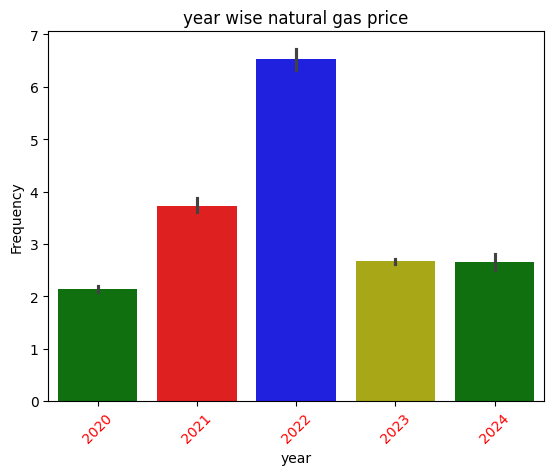

In [24]:
#retriving natural gas price by year natural gas price by year

color=['g','r','b','y']
sns.barplot(x='year',y='Natural_Gas_Price',data=df,palette=color)
plt.title('year wise natural gas price')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.xticks(rotation=45,color='r',fontsize=10)
plt.show()


In [25]:


# Dictionary mapping random month numbers (as strings) to month names
month_map = {
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

# If the column name is different, replace 'month' with the actual column name
column_name = 'month'

# Convert month column to string type to ensure consistency
df[column_name] = df[column_name].astype(str)


# Apply the mapping to the month column
df[column_name] = df[column_name].map(month_map)

# If you want to write the updated DataFrame back to the Excel file
# df.to_excel('updated_file.xlsx', index=False)
df


,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,month,year
0,0,2024-02-02,2.079,161340.0,72.28,577940.0,3.8215,43194.7,42650,901.6,...,564.64,4030000,171.81,117220000,474.99,84710000,2053.7,260920.0,February,2024
1,1,2024-02-01,2.050,142860.0,73.82,344490.0,3.8535,43081.4,47690,922.3,...,567.51,3150000,159.28,66360000,394.78,25140000,2071.1,238370.0,February,2024
2,2,2024-01-31,2.100,139750.0,75.85,347240.0,3.9060,42580.5,56480,932.6,...,564.11,4830000,155.20,49690000,390.14,20010000,2067.4,214590.0,January,2024
3,3,2024-01-30,2.077,3590.0,77.82,331930.0,3.9110,42946.2,55130,931.7,...,562.85,6120000,159.00,42290000,400.06,18610000,2050.9,1780.0,January,2024
4,4,2024-01-29,2.490,73020.0,76.78,365460.0,3.8790,43299.8,45230,938.3,...,575.79,6880000,161.26,42840000,401.02,17790000,2034.9,410.0,January,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,985,2020-02-11,1.788,195460.0,49.94,1210000.0,2.5875,10229.5,791280,971.75,...,373.69,4770000,107.54,114920000,207.19,25030000,1570.1,286420.0,February,2020
986,986,2020-02-10,1.766,184040.0,49.57,582650.0,2.5545,9854.1,781220,965.45,...,371.07,5290000,106.70,101120000,213.06,11860000,1579.5,229000.0,February,2020
987,987,2020-02-07,1.858,163790.0,50.32,724240.0,2.5570,9818.6,608960,970.15,...,366.77,4390000,103.96,101910000,212.33,12240000,1573.4,306050.0,February,2020
988,988,2020-02-06,1.862,135680.0,50.95,885860.0,2.5965,9772.0,778670,968.9,...,366.95,3920000,102.51,63660000,210.85,10570000,1570.0,349000.0,February,2020


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              990 non-null    int64         
 1   Date               990 non-null    datetime64[ns]
 2   Natural_Gas_Price  990 non-null    float64       
 3   Natural_Gas_Vol.   990 non-null    float64       
 4   Crude_oil_Price    990 non-null    float64       
 5   Crude_oil_Vol.     990 non-null    float64       
 6   Copper_Price       990 non-null    float64       
 7   Bitcoin_Price      990 non-null    float64       
 8   Bitcoin_Vol.       990 non-null    int64         
 9   Platinum_Price     990 non-null    object        
 10  Ethereum_Price     990 non-null    object        
 11  Ethereum_Vol.      990 non-null    int64         
 12  S&P_500_Price      990 non-null    object        
 13  Nasdaq_100_Price   990 non-null    object        
 14  Nasdaq_100

C:\Users\HP\AppData\Local\Temp\ipykernel_11436\2242110905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year',y='Gold_Price',data=df,palette=color)
C:\Users\HP\AppData\Local\Temp\ipykernel_11436\2242110905.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='year',y='Gold_Price',data=df,palette=color)


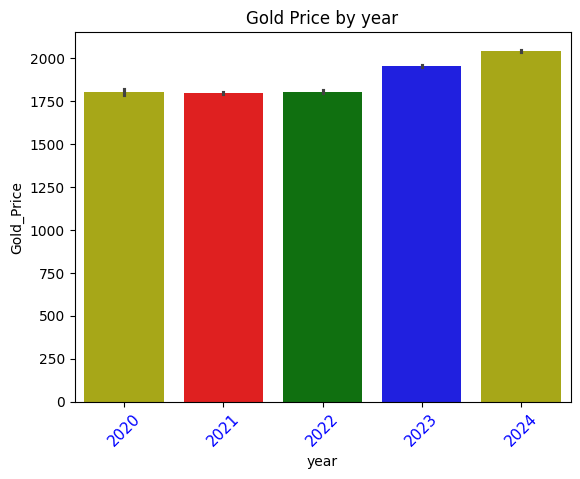

In [27]:
# natural gas price by month in year

color=['y','r','g','b']
sns.barplot(x='year',y='Gold_Price',data=df,palette=color)
plt.title("Gold Price by year")
plt.xlabel("year")
plt.ylabel("Gold_Price")
plt.xticks(rotation=45,color='b',fontsize=11)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11436\248041268.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 100)` for the same effect.

  sns.barplot(x='year', y='Gold_Price',data=df,palette='Accent',ci=100,saturation=70,hue='month',errcolor='g',errwidth=2)
C:\Users\HP\AppData\Local\Temp\ipykernel_11436\248041268.py:4: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'g'}` instead.

  sns.barplot(x='year', y='Gold_Price',data=df,palette='Accent',ci=100,saturation=70,hue='month',errcolor='g',errwidth=2)
C:\Users\HP\AppData\Local\Temp\ipykernel_11436\248041268.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x='year', y='Gold_Price',data=df,palette='Accent',ci=100,saturation=70,hue='month',errcolor='g',errwidth=2)


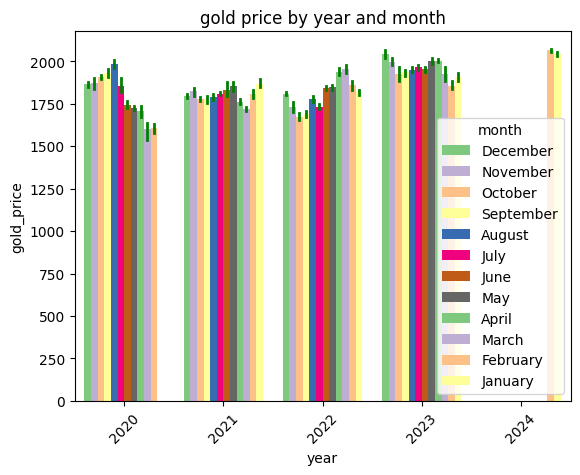

In [28]:

#plt.figure(figsize=(12, 8))

#c_palette = ['g','y','b','r']
sns.barplot(x='year', y='Gold_Price',data=df,palette='Accent',ci=100,saturation=70,hue='month',errcolor='g',errwidth=2)

# hue is use to differentiate the column using another column

plt.title('gold price by year and month')
plt.xlabel('year')
plt.ylabel('gold_price')
plt.xticks(rotation=45)
plt.show()

In [43]:
#This line retrieves the column names of the DataFrame df and converts them 
#into a list using the tolist() method. These column names are stored in the variable cols0.
cols0 = df.columns.tolist()
cols=[]            #creatr empty list
for col in cols0:  #This initiates a loop that iterates over each column name in the list cols0.
    if '_Price' in col:
        cols+=[col]
print(cols)       #this line prints out the list cols, which contains the names of columns that contain the substring '_Price'

['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price', 'Gold_Price']


In [44]:
cols2=[]
for col in cols:  #iterate through each column name in the cols
    if df[col].dtype==np.float64:
        cols2+=[col]  #the current column name col is appended to the list cols2.
print(cols2)

['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price', 'Gold_Price']


In [50]:
cols3=list(set(cols)-set(cols2)) #this creates a set from the list cols,cols2, removing any duplicates.
print(cols3)

['Nasdaq_100_Price', 'S&P_500_Price', 'Platinum_Price', 'Ethereum_Price']


In [57]:
df[cols3].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nasdaq_100_Price  990 non-null    object
 1   S&P_500_Price     990 non-null    object
 2   Platinum_Price    990 non-null    object
 3   Ethereum_Price    990 non-null    object
dtypes: object(4)
memory usage: 38.7+ KB


In [58]:
df[cols2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  990 non-null    float64
 1   Crude_oil_Price    990 non-null    float64
 2   Copper_Price       990 non-null    float64
 3   Bitcoin_Price      990 non-null    float64
 4   Apple_Price        990 non-null    float64
 5   Tesla_Price        990 non-null    float64
 6   Microsoft_Price    990 non-null    float64
 7   Silver_Price       990 non-null    float64
 8   Google_Price       990 non-null    float64
 9   Nvidia_Price       990 non-null    float64
 10  Berkshire_Price    990 non-null    float64
 11  Netflix_Price      990 non-null    float64
 12  Amazon_Price       990 non-null    float64
 13  Meta_Price         990 non-null    float64
 14  Gold_Price         990 non-null    float64
dtypes: float64(15)
memory usage: 123.8 KB


In [52]:
df

,index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,month,year
0,0,2024-02-02,2.079,161340.0,72.28,577940.0,3.8215,43194.7,42650,901.6,...,564.64,4030000,171.81,117220000,474.99,84710000,2053.7,260920.0,February,2024
1,1,2024-02-01,2.050,142860.0,73.82,344490.0,3.8535,43081.4,47690,922.3,...,567.51,3150000,159.28,66360000,394.78,25140000,2071.1,238370.0,February,2024
2,2,2024-01-31,2.100,139750.0,75.85,347240.0,3.9060,42580.5,56480,932.6,...,564.11,4830000,155.20,49690000,390.14,20010000,2067.4,214590.0,January,2024
3,3,2024-01-30,2.077,3590.0,77.82,331930.0,3.9110,42946.2,55130,931.7,...,562.85,6120000,159.00,42290000,400.06,18610000,2050.9,1780.0,January,2024
4,4,2024-01-29,2.490,73020.0,76.78,365460.0,3.8790,43299.8,45230,938.3,...,575.79,6880000,161.26,42840000,401.02,17790000,2034.9,410.0,January,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,985,2020-02-11,1.788,195460.0,49.94,1210000.0,2.5875,10229.5,791280,971.75,...,373.69,4770000,107.54,114920000,207.19,25030000,1570.1,286420.0,February,2020
986,986,2020-02-10,1.766,184040.0,49.57,582650.0,2.5545,9854.1,781220,965.45,...,371.07,5290000,106.70,101120000,213.06,11860000,1579.5,229000.0,February,2020
987,987,2020-02-07,1.858,163790.0,50.32,724240.0,2.5570,9818.6,608960,970.15,...,366.77,4390000,103.96,101910000,212.33,12240000,1573.4,306050.0,February,2020
988,988,2020-02-06,1.862,135680.0,50.95,885860.0,2.5965,9772.0,778670,968.9,...,366.95,3920000,102.51,63660000,210.85,10570000,1570.0,349000.0,February,2020


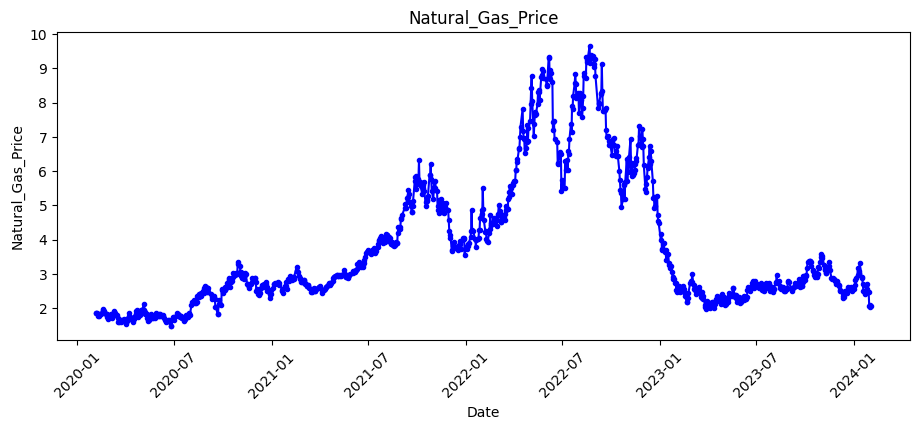

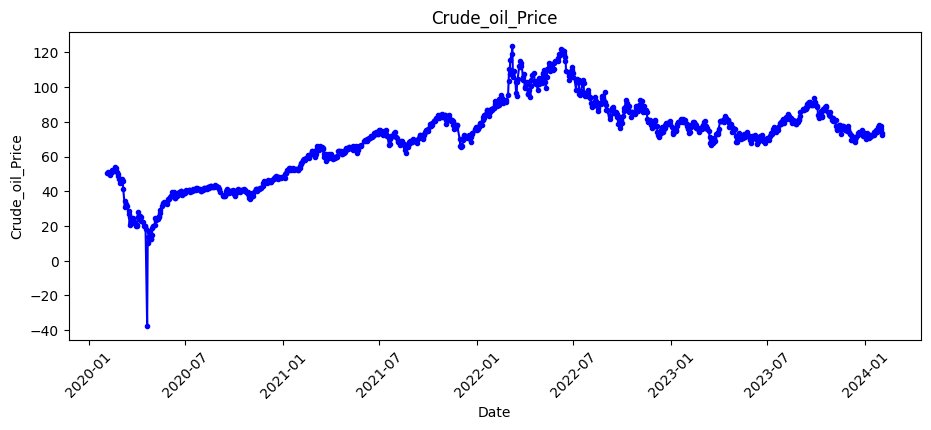

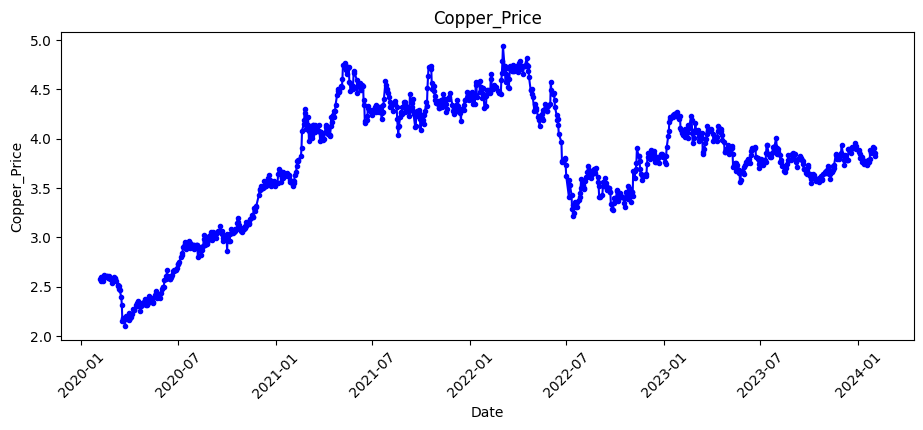

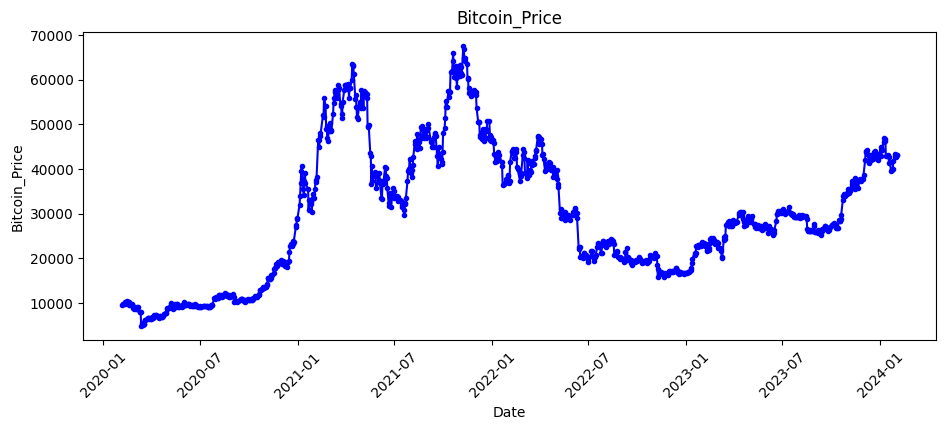

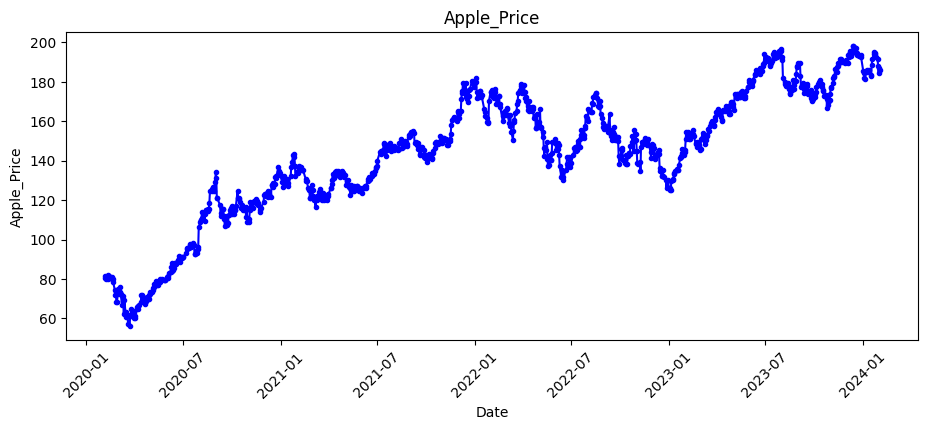

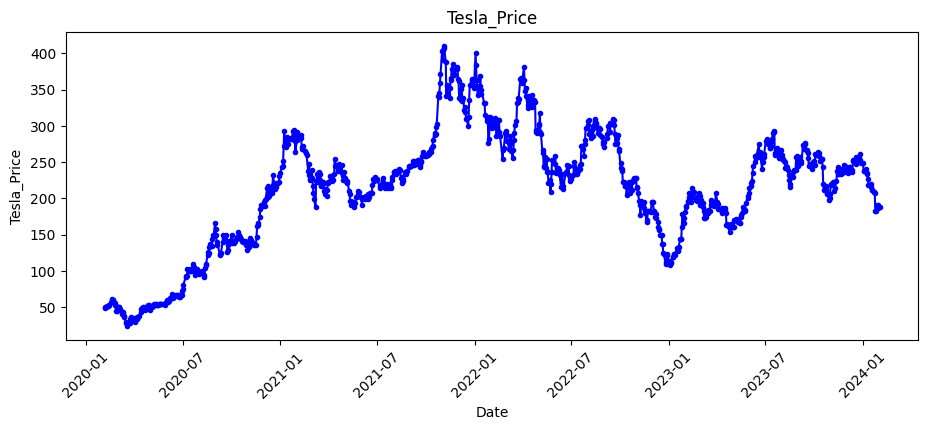

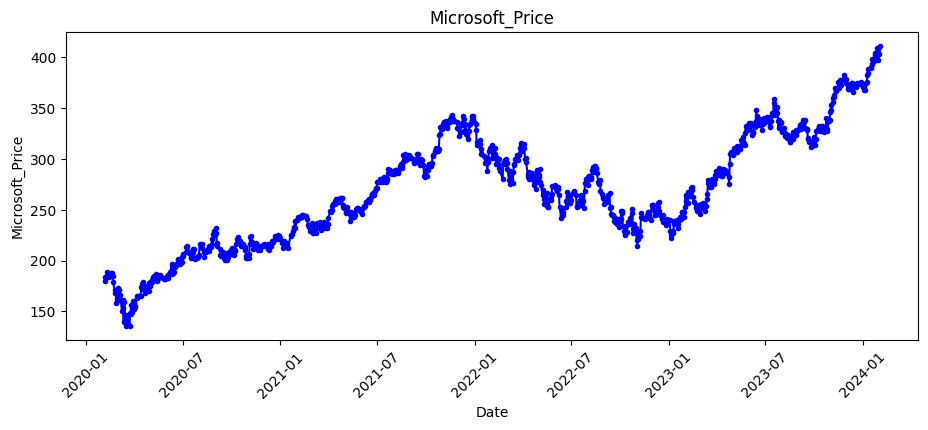

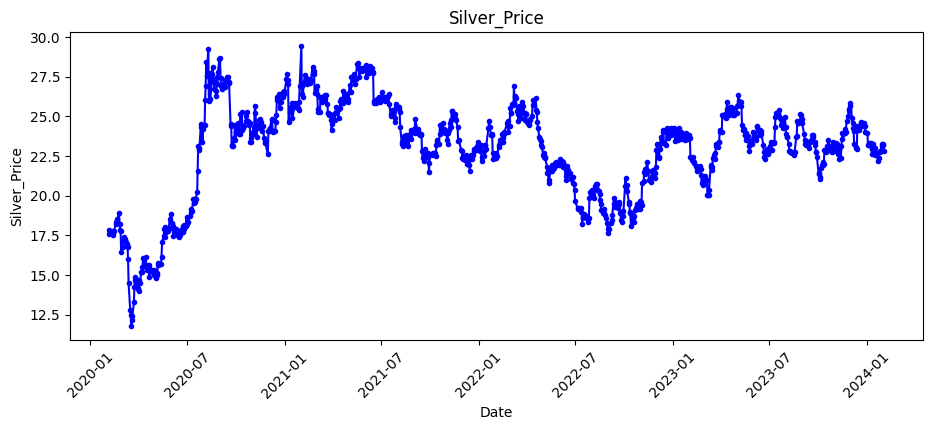

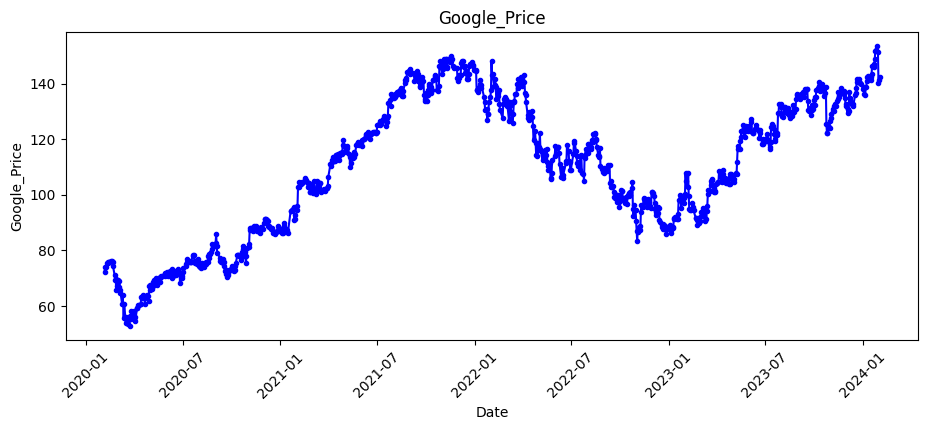

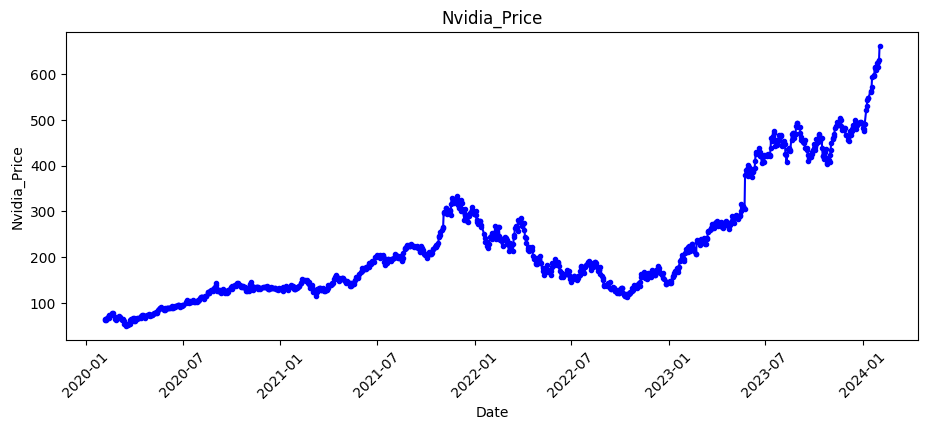

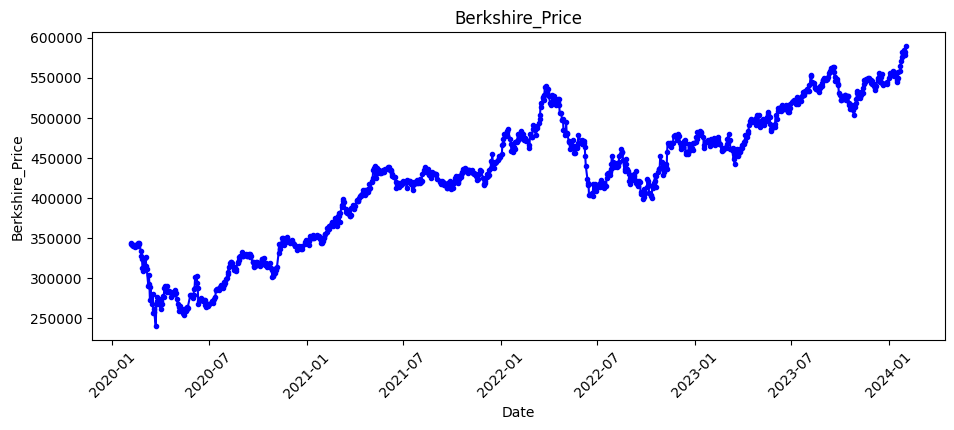

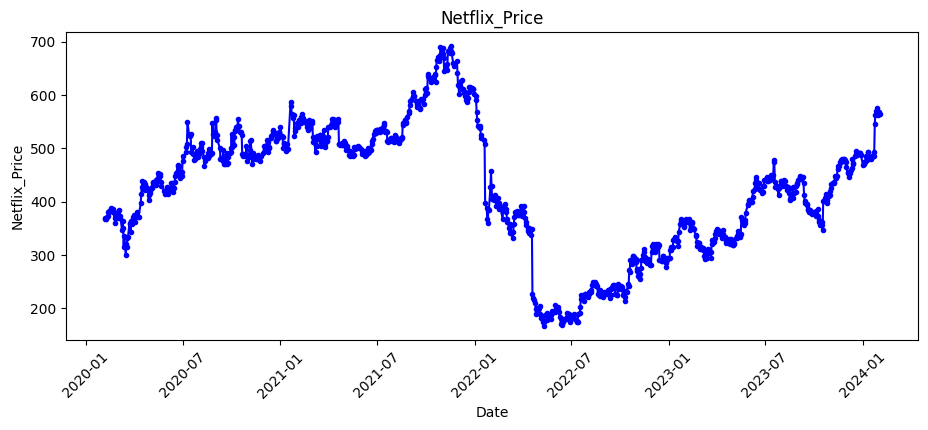

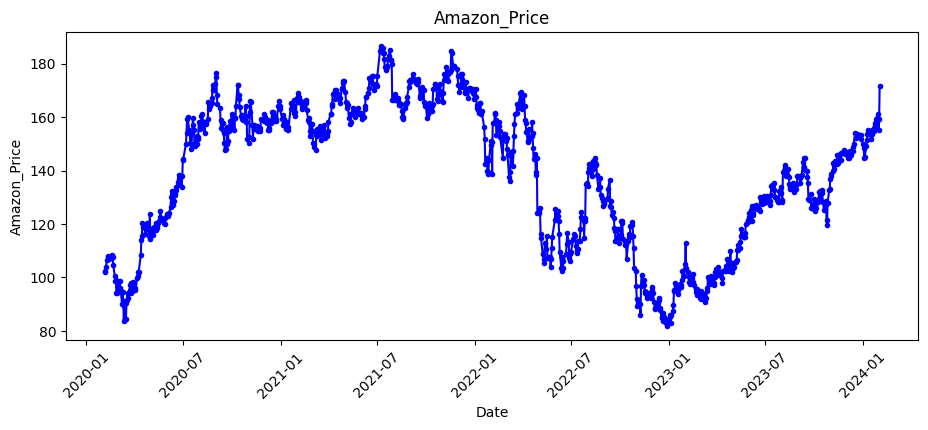

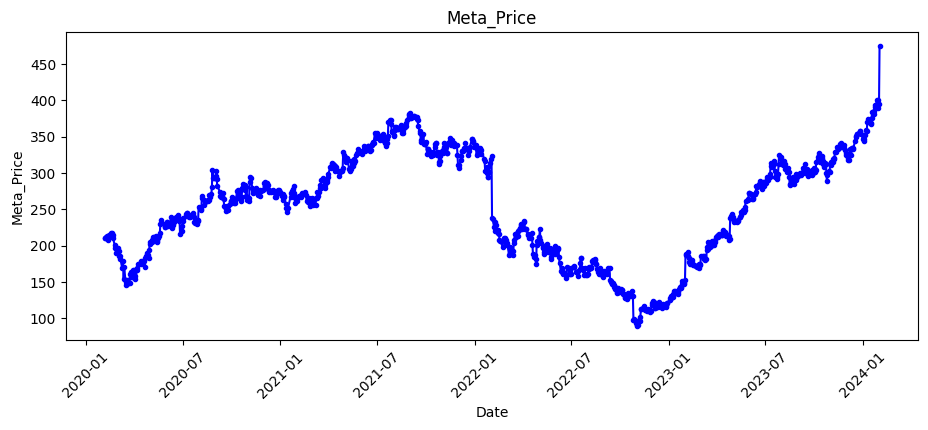

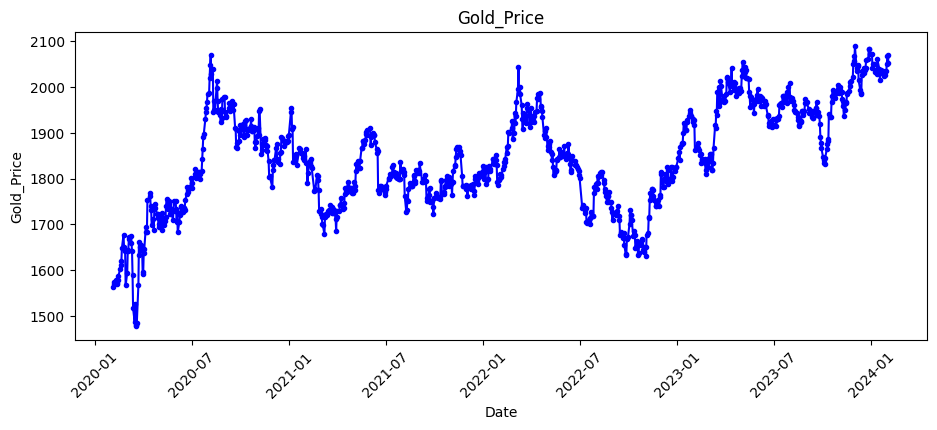

In [63]:
for col in cols2:
    plt.figure(figsize=(11,4))
    plt.plot(df['Date'],df[col], marker='o', markersize=3,color='b')  # the values of the column on the y-axis (df[col]).
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()